In [1]:
import mne
from glob import glob
import os

In [2]:
import os

In [3]:
import numpy as np

np.__version__

'2.0.1'

In [4]:
files = glob("../data/BCICIV_2a_gdf/*")
files

['../data/BCICIV_2a_gdf/A01E.gdf',
 '../data/BCICIV_2a_gdf/A01T.gdf',
 '../data/BCICIV_2a_gdf/A02E.gdf',
 '../data/BCICIV_2a_gdf/A02T.gdf',
 '../data/BCICIV_2a_gdf/A03E.gdf',
 '../data/BCICIV_2a_gdf/A03T.gdf',
 '../data/BCICIV_2a_gdf/A04E.gdf',
 '../data/BCICIV_2a_gdf/A04T.gdf',
 '../data/BCICIV_2a_gdf/A05E.gdf',
 '../data/BCICIV_2a_gdf/A05T.gdf',
 '../data/BCICIV_2a_gdf/A06E.gdf',
 '../data/BCICIV_2a_gdf/A06T.gdf',
 '../data/BCICIV_2a_gdf/A07E.gdf',
 '../data/BCICIV_2a_gdf/A07T.gdf',
 '../data/BCICIV_2a_gdf/A08E.gdf',
 '../data/BCICIV_2a_gdf/A08T.gdf',
 '../data/BCICIV_2a_gdf/A09E.gdf',
 '../data/BCICIV_2a_gdf/A09T.gdf']

In [5]:
def load_data_raw(file_path):
    raw = mne.io.read_raw_gdf(file_path, preload=True)
    return raw

In [56]:
files[0]

'../data/BCICIV_2a_gdf/A01E.gdf'

In [57]:
raw = load_data_raw(files[1])
raw

Extracting EDF parameters from /home/may33/projects/bci/data/BCICIV_2a_gdf/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


/home/may33/miniconda3/envs/bci/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [60]:
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]


In [62]:
events

array([[     0,      0,      5],
       [     0,      0,      3],
       [ 29683,      0,      5],
       ...,
       [670550,      0,      6],
       [670550,      0,      1],
       [671050,      0,      7]])

### Event ID mapping (BCI Competition IV-2a)

| Event code | Events array ID | Meaning                          |
|------------|-----------------|----------------------------------|
| **1023**   | 1               | Rejected trial (artifact)        |
| **1072**   | 2               | Eye movements (EOG calibration)  |
| **276**    | 3               | Idling EEG – eyes open           |
| **277**    | 4               | Idling EEG – eyes closed         |
| **32766**  | 5               | Start of a new run               |
| **768**    | 6               | Start of a trial                 |
| **769**    | 7               | Cue: left hand                   |
| **770**    | 8               | Cue: right hand                  |
| **771**    | 9               | Cue: feet                        |
| **772**    | 10              | Cue: tongue                      |


In [63]:
event_id

{np.str_('1023'): 1,
 np.str_('1072'): 2,
 np.str_('276'): 3,
 np.str_('277'): 4,
 np.str_('32766'): 5,
 np.str_('768'): 6,
 np.str_('769'): 7,
 np.str_('770'): 8,
 np.str_('771'): 9,
 np.str_('772'): 10}

In [11]:
raw.ch_names

['EEG-Fz',
 'EEG-0',
 'EEG-1',
 'EEG-2',
 'EEG-3',
 'EEG-4',
 'EEG-5',
 'EEG-C3',
 'EEG-6',
 'EEG-Cz',
 'EEG-7',
 'EEG-C4',
 'EEG-8',
 'EEG-9',
 'EEG-10',
 'EEG-11',
 'EEG-12',
 'EEG-13',
 'EEG-14',
 'EEG-Pz',
 'EEG-15',
 'EEG-16',
 'EOG-left',
 'EOG-central',
 'EOG-right']

In [12]:
raw.get_channel_types()

['eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg']

In [13]:
eeg_names = [
    "Fz","FC3","FC1","FCz","FC2","FC4","C5","C3","C1","Cz","C2","C4","C6",
    "CP3","CP1","CPz","CP2","CP4","P1","Pz","P2","POz"
]
eog_names = ["EOG-left", "EOG-right", "EOG-central"]

current = raw.ch_names

rename_map = {}

for i, ch in enumerate(current):
    if i < 22:
        rename_map[ch] = eeg_names[i]
    else:
        diff = 22 - i
        rename_map[ch] = eog_names[diff]

In [14]:
rename_map

{'EEG-Fz': 'Fz',
 'EEG-0': 'FC3',
 'EEG-1': 'FC1',
 'EEG-2': 'FCz',
 'EEG-3': 'FC2',
 'EEG-4': 'FC4',
 'EEG-5': 'C5',
 'EEG-C3': 'C3',
 'EEG-6': 'C1',
 'EEG-Cz': 'Cz',
 'EEG-7': 'C2',
 'EEG-C4': 'C4',
 'EEG-8': 'C6',
 'EEG-9': 'CP3',
 'EEG-10': 'CP1',
 'EEG-11': 'CPz',
 'EEG-12': 'CP2',
 'EEG-13': 'CP4',
 'EEG-14': 'P1',
 'EEG-Pz': 'Pz',
 'EEG-15': 'P2',
 'EEG-16': 'POz',
 'EOG-left': 'EOG-left',
 'EOG-central': 'EOG-central',
 'EOG-right': 'EOG-right'}

In [15]:
mne.viz.set_browser_backend("qt")

Using qt as 2D backend.


In [16]:
raw.rename_channels(rename_map)

<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [17]:
raw

<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [18]:
types = {ch: "eog" for ch in eog_names}

In [19]:
eog_names

['EOG-left', 'EOG-right', 'EOG-central']

In [20]:
types

{'EOG-left': 'eog', 'EOG-right': 'eog', 'EOG-central': 'eog'}

In [21]:
raw.set_montage("standard_1020", match_case=False, on_missing="warn")

/tmp/ipykernel_164072/2381065304.py:1: RuntimeWarning: DigMontage is only a subset of info. There are 3 channel positions not present in the DigMontage. The channels missing from the montage are:

['EOG-left', 'EOG-central', 'EOG-right'].

Consider using inst.rename_channels to match the montage nomenclature, or inst.set_channel_types if these are not EEG channels, or use the on_missing parameter if the channel positions are allowed to be unknown in your analyses.
  raw.set_montage("standard_1020", match_case=False, on_missing="warn")


<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [22]:
raw.set_channel_types(types)

<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [55]:
raw.plot()

In [24]:
psd = raw.compute_psd()

Effective window size : 8.192 (s)


Plotting power spectral density (dB=True).


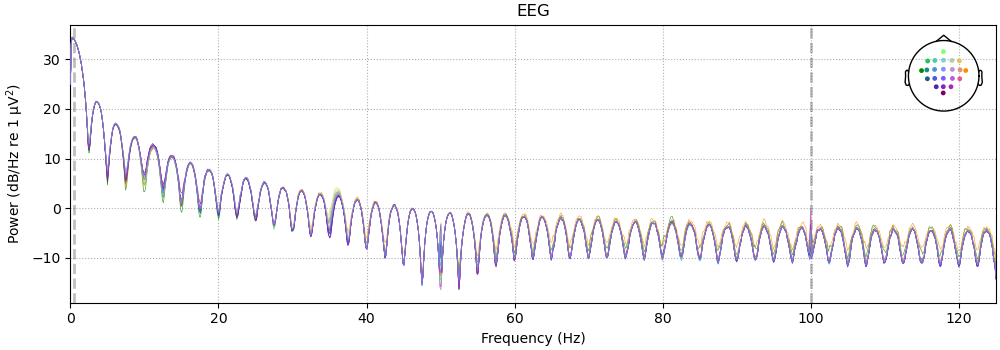

In [25]:
%matplotlib widget

psd.plot(show=False);

In [26]:
cleaned = raw.copy()

In [27]:
cleaned.notch_filter(
    freqs=[50, 100],
    picks="eeg",
)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [28]:
psd_cleaned = cleaned.compute_psd()

Effective window size : 8.192 (s)


Plotting power spectral density (dB=True).


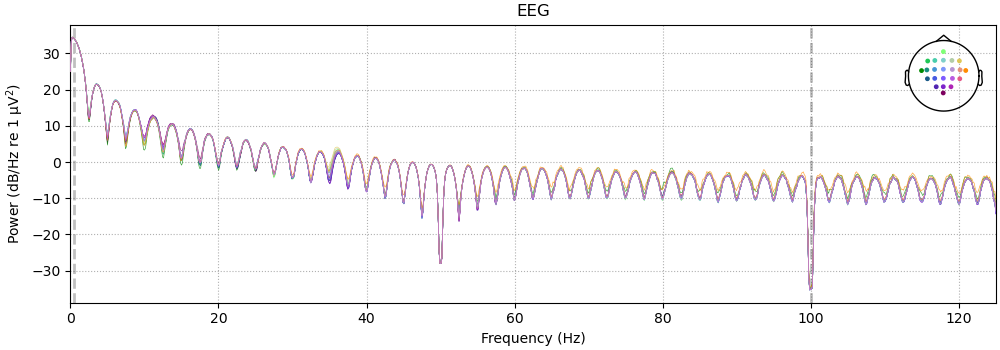

In [29]:
psd_cleaned.plot(show=False);

In [30]:
band_pass = raw.copy()

In [31]:
band_pass.filter(   
    l_freq=4.0, h_freq=38.0,    
    picks="eeg",
)   

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 38 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 38.00 Hz
- Upper transition bandwidth: 9.50 Hz (-6 dB cutoff frequency: 42.75 Hz)
- Filter length: 413 samples (1.652 s)



<RawGDF | A01T.gdf, 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

In [32]:
psd_band_pass = band_pass.compute_psd()

Effective window size : 8.192 (s)


Plotting power spectral density (dB=True).


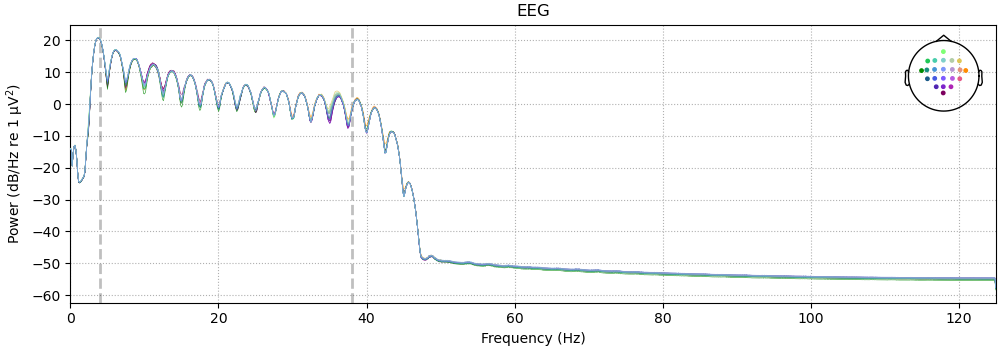

In [34]:
psd_band_pass.plot(show=False);

In [35]:
cleaned_raw_eeg_only = cleaned.copy().pick(picks=["eeg"])

In [36]:
cleaned_raw_eeg_only

<RawGDF | A01T.gdf, 22 x 672528 (2690.1 s), ~112.9 MiB, data loaded>

In [37]:
cleaned_raw_eeg_only.set_eeg_reference("average")

cleaned_raw_eeg_only.filter(l_freq=1.0, h_freq=None)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



<RawGDF | A01T.gdf, 22 x 672528 (2690.1 s), ~112.9 MiB, data loaded>

In [38]:
from mne.preprocessing import ICA

ica_processor = ICA(
    n_components=20,
    random_state=33
)

In [39]:
ica_processor.fit(cleaned_raw_eeg_only)

Fitting ICA to data using 22 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 5.5s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,45 iterations on raw data (672528 samples)
ICA components,20
Available PCA components,22
Channel types,eeg
ICA components marked for exclusion,—


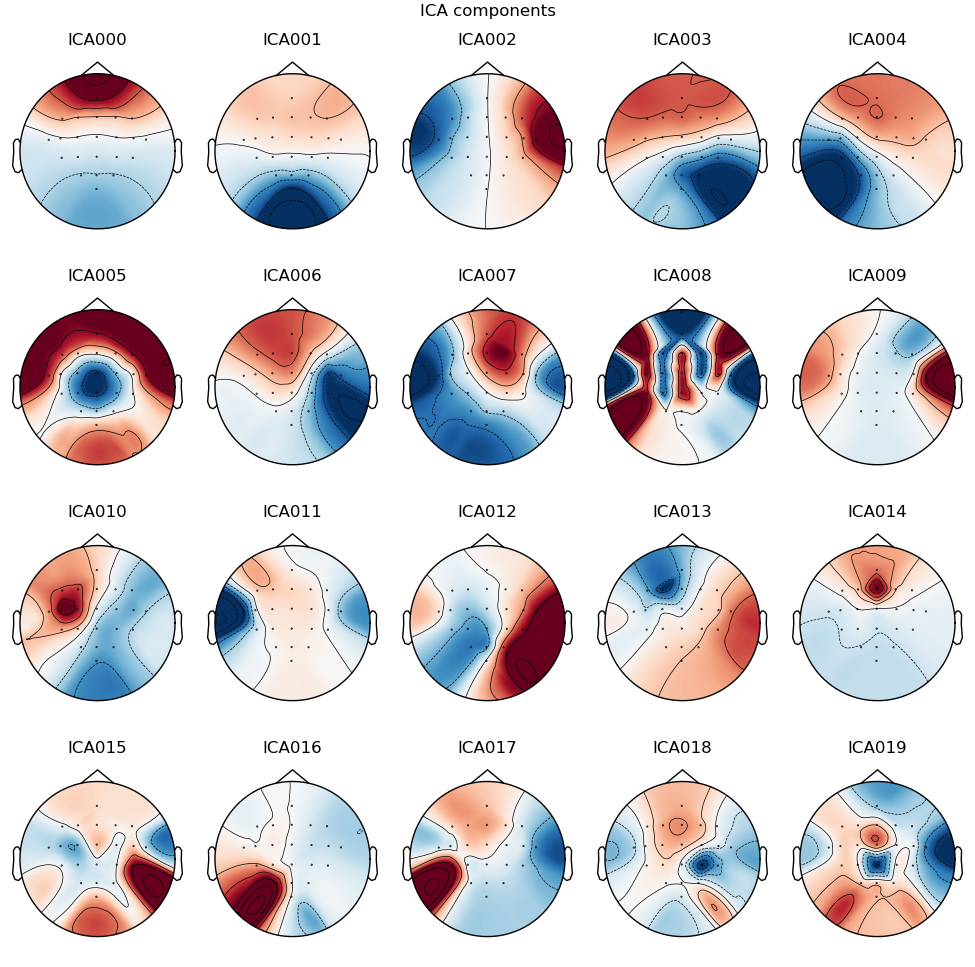

In [40]:
ica_processor.plot_components();

In [44]:
ica_processor.plot_sources(cleaned_raw_eeg_only, picks=[0])

Creating RawArray with float64 data, n_channels=1, n_times=672528
    Range : 0 ... 672527 =      0.000 ...  2690.108 secs
Ready.


In [45]:
import torch

In [46]:
keep_events = [7,8,9,10]

In [52]:
epochs = mne.Epochs(
    raw=cleaned,
    events=events,
    event_id=keep_events,
    tmin=-1,
    tmax=2,
    baseline=None,
    preload=True,
    reject_by_annotation=True,
    picks='eeg',
)

Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped


In [53]:
epochs

<Epochs | 288 events (all good), -1 – 2 s (baseline off), ~36.3 MiB, data loaded,
 '7': 72
 '8': 72
 '9': 72
 '10': 72>

In [54]:
cleamed.plot()

NameError: name 'cleamed' is not defined

In [ ]:
epochs.save("subj_A01-epo.fif", overwrite=True)
